<h1 align="center" style="color: orange"> Probability </h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Distributions

**Normal Distribution or Gaussian Distribution**



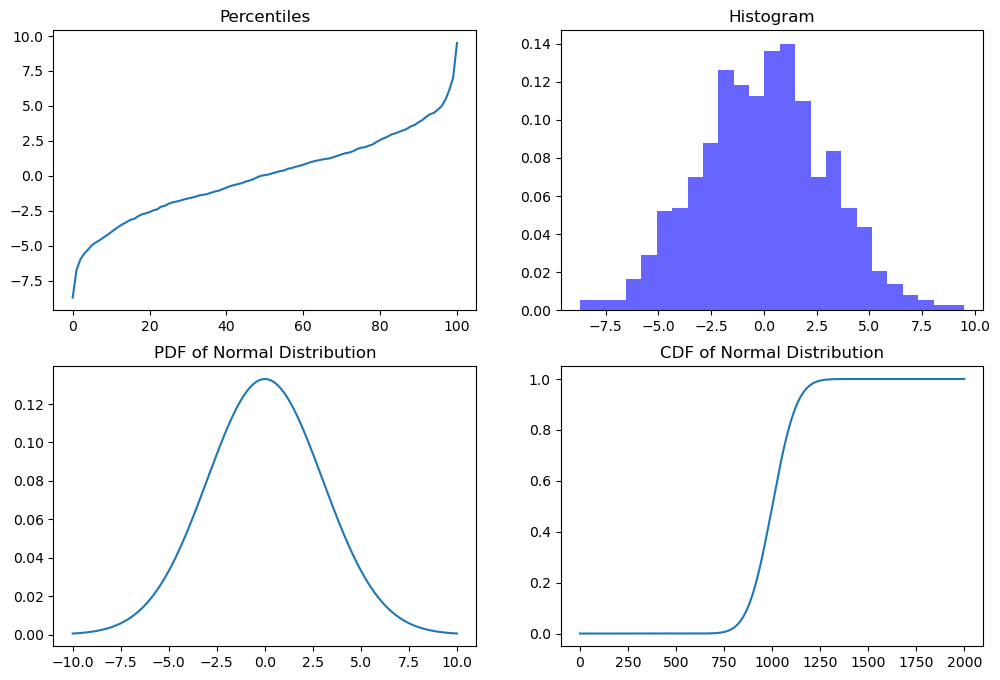

In [19]:
# Parameters for the normal distribution
mean, std_dev, seed = 0, 3, 89765
rng = np.random.default_rng(seed)

# Generate random observations from the normal distribution
observations = rng.normal(mean, std_dev, size=1000)
percentiles = np.percentile(observations, np.arange(0, 101))

# Calculate PDF
data_points = np.arange(-10, 10, 0.01)
pdf = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-((data_points - mean)**2) / (2 * std_dev**2))

# calculating CDF 
cdf = stats.norm.cdf(data_points)

# Plotting
_, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(percentiles)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(observations, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title('Histogram')

axes[1, 0].plot(data_points, pdf)
axes[1, 0].set_title('PDF of Normal Distribution')

axes[1, 1].plot(cdf)
axes[1, 1].set_title('CDF of Normal Distribution')

plt.show()

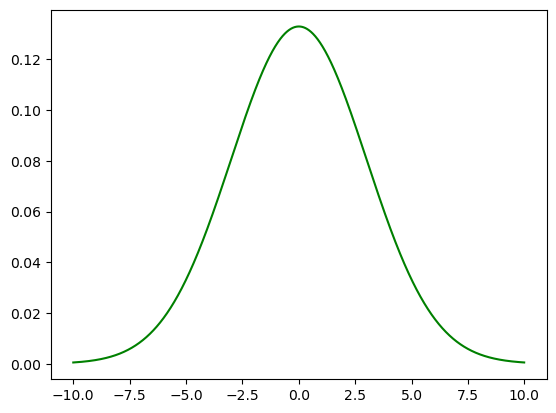

In [18]:
# using scipy stats module
pdf_2 = stats.norm.pdf(data_points, mean, std_dev)

plt.plot(data_points, pdf_2, color='g')
plt.show()

**Student's t-distribution**

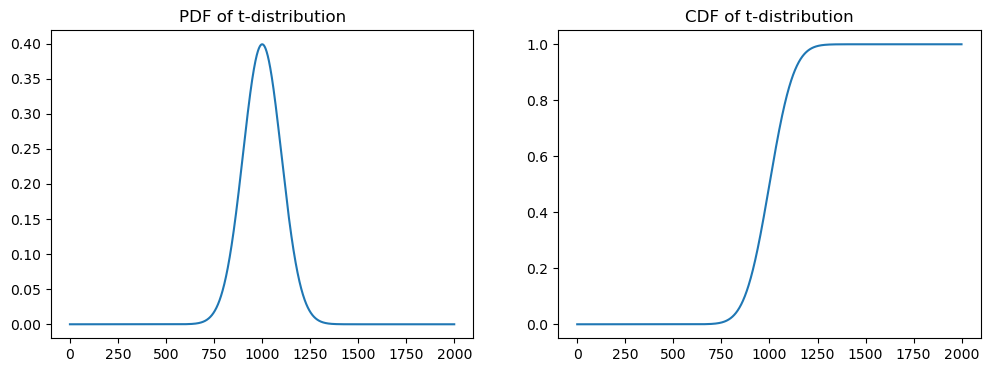

In [16]:
degree_of_freedom = len(data_points) - 1
pdf_t = stats.t.pdf(data_points, degree_of_freedom)
cdf_t = stats.t.cdf(data_points, degree_of_freedom)


_, axes = plt.subplots(1,2, figsize=(12, 4))
axes[0].plot(pdf_t)
axes[0].set_title('PDF of t-distribution')

axes[1].plot(cdf_t)
axes[1].set_title('CDF of t-distribution')

plt.show()

**Uniform Distribution**

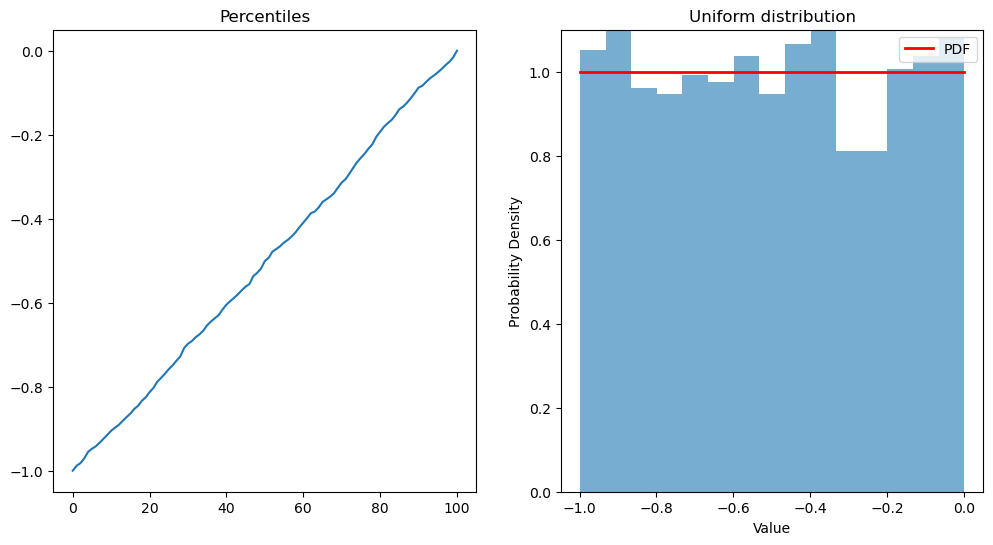

In [21]:
# Uniform distribution parameters
a = -1  # Lower bound
b = 0   # Upper bound

uniform_dist = rng.uniform(a, b, 1000)

# Calculate percentiles
percentiles_uniform = np.percentile(uniform_dist, np.arange(0, 101))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot percentiles
axes[0].plot(np.arange(0, 101), percentiles_uniform)
axes[0].set_title('Percentiles')

# Plot histogram and PDF
count, bins, _ = axes[1].hist(uniform_dist, 15, density=True, alpha=0.6)
pdf = np.ones_like(bins) / (b - a)
axes[1].plot(bins, pdf, linewidth=2, color='r', label='PDF')
axes[1].legend()
axes[1].set_title('Uniform distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Probability Density')
axes[1].set_ylim(0, 1 / (b - a) + 0.1)

plt.show()

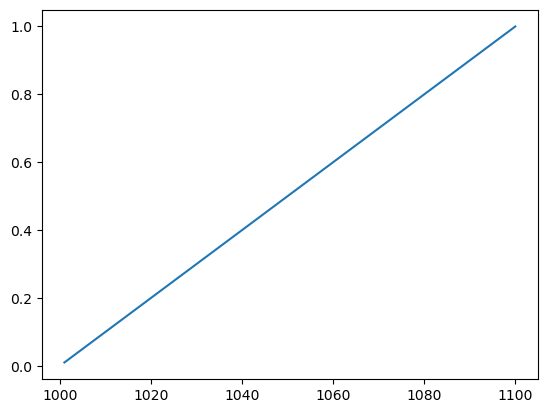

In [28]:
pdf_u = stats.uniform.pdf(uniform_dist)
cdf_u = stats.uniform.cdf(uniform_dist)
pmf_u = stats.uniform.ppf(data_points)
# plt.plot(pdf_u, color='r')
plt.plot(pmf_u)
plt.show()

**Chi-squared distribution**

**Binomial Distribution**

**Q-Q plot**

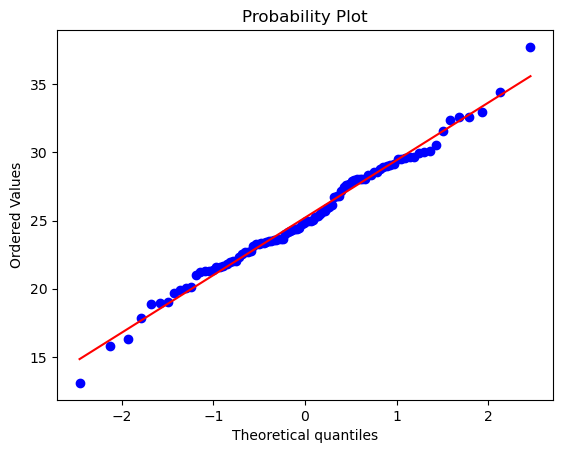

In [23]:
stats.probplot(observations, dist='norm', plot=plt)
plt.show()

**Box Cox Transformation**

$$\color{#F99417}Normal \rightarrow exponential \rightarrow  normal$$

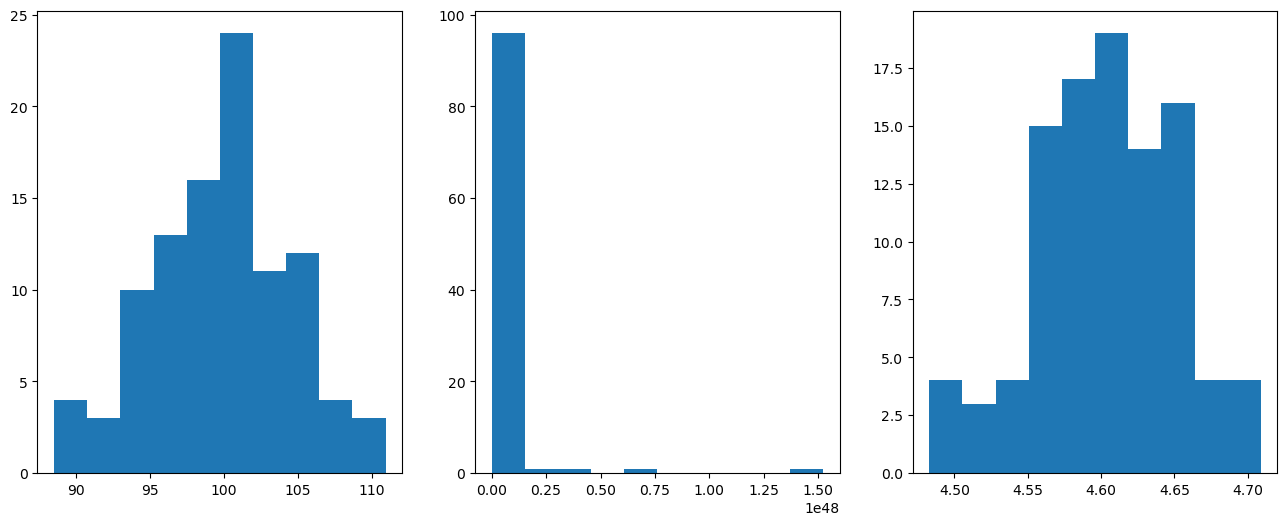

In [18]:
data = 5* np.random.randn(100) + 100

# exponential
exponential = np.exp(data)

# box-cox
res = stats.boxcox(data, 0)

_, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].hist(data)
axes[1].hist(exponential)
axes[2].hist(res)

plt.show()

## API's covered

- [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)


- [np.random.default_rng().normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) : Draw random samples from a normal (Gaussian) distribution (`numpy.random.Generator.normal`).

- [numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)

- [numpy.median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)

- [numpy.var](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)

- [numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)



In [10]:
# np.random.default_rng().normal

rng = np.random.default_rng(seed=13)    # recommended constructor for random.Generator

print(rng)

# float number
float_num = rng.random()
print(float_num)

# ints
random_ints = rng.integers(low=1, high=100, size=10)
print(random_ints)

# more than array
random_matrix = rng.random((3, 4))
random_matrix

Generator(PCG64)
0.8647975870165865
[82 85  7 81 94 26 17  8 80 94]


array([[0.61379169, 0.00263075, 0.91040718, 0.98480348],
       [0.2862966 , 0.81366112, 0.08240794, 0.43828005],
       [0.81770377, 0.40873333, 0.51774971, 0.11703988]])